In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
age_bucket_order = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39',
                    '40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79',
                    '80-84','85-89','90-94','95-99','100-']

In [3]:
pop_df = pd.read_csv("fiveyear_pop.csv")
pop_df.head()

,year,name,population,gender,age
0,1990,Andorra,27.0,Both,95-99
1,1990,Andorra,67.0,Both,90-94
2,1990,Andorra,292.0,Both,85-89
3,1990,Andorra,573.0,Both,80-84
4,1990,Andorra,981.0,Both,75-79


In [4]:
pop_df["gender"] = pop_df["gender"].astype("category")
pop_df["age"] = pop_df["age"].astype("category")
pop_df["age"] = pop_df["age"].cat.set_categories(age_bucket_order,ordered=True)
pop_df['age']

0          95-99
1          90-94
2          85-89
3          80-84
4          75-79
           ...  
1648768    20-24
1648769    15-19
1648770    10-14
1648771     100-
1648772      0-4
Name: age, Length: 1648773, dtype: category
Categories (21, object): ['0-4' < '5-9' < '10-14' < '15-19' ... '85-89' < '90-94' < '95-99' < '100-']

In [5]:
military_df = pd.read_csv('country_military.csv',na_values='..')

In [6]:
military_df = military_df.rename(columns={'2010 [YR2010]':'2010',
                                          '2011 [YR2011]':'2011',
                                          '2012 [YR2012]':'2012',
                                          '2013 [YR2013]':'2013',
                                          '2014 [YR2014]':'2014',
                                          '2015 [YR2015]':'2015',
                                          '2016 [YR2016]':'2016',
                                          '2017 [YR2017]':'2017',
                                          '2018 [YR2018]':'2018',
                                          '2019 [YR2019]':'2019',
                                          '2020 [YR2020]':'2020'
                                         })
military_df.head(2)

,Country Name,Country Code,Series Name,Series Code,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.945836,1.821345,1.175416,1.076950,1.298013,0.994576,0.956772,0.945227,1.006746,1.118231,1.369684
1,Afghanistan,AFG,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,4.342103,4.614584,4.367420,4.063753,3.614223,3.569492,3.467568,3.339999,2.722970,2.677703,NaN


In [7]:
military_df = military_df.melt(id_vars=['Country Name','Country Code','Series Name','Series Code'],
                 var_name='year'
                ).sort_values(['Country Name','year'])
military_df['year'] = military_df['year'].astype(int)
military_df = military_df.loc[(military_df['year'] <= 2019) & (military_df['year'] >= 2010)]
military_df.head()

,Country Name,Country Code,Series Name,Series Code,year,value
0,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2010,1.945836e+00
1,Afghanistan,AFG,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2010,4.342103e+00
2,Afghanistan,AFG,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,2010,3.770000e+08
3,Afghanistan,AFG,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2010,NaN
4,Afghanistan,AFG,"Labor force, total",SL.TLF.TOTL.IN,2010,7.065700e+06


In [8]:
regions_df = pd.read_csv("regional_classifications.csv")
regions_df.head(3)

,Country Name,Iso3 code,UN Regions,UN sub-region,UNICEF region,WHO Region,World Bank Income Group,World Bank Income Group Combined,World Bank Regions,MDG Region,SDG Region,LDCs,Developed/Developing
0,Afghanistan,AFG,Asia,Southern Asia,South Asia,EMRO,Low income,Low and Middle Income,South Asia,Southern Asia,Central Asia and Southern Asia,Least Developed Countries (LDCs),Developing regions
1,Albania,ALB,Europe,Southern Europe,Europe & Central Asia,EURO,Middle Income,Low and Middle Income,Europe & Central Asia,Developed regions,Northern America and Europe,NaN,Developed regions
2,Algeria,DZA,Africa,Northern Africa,Middle East & North Africa,AFRO,Middle Income,Low and Middle Income,Middle East & North Africa,Northern Africa,Western Asia and Northern Africa,NaN,Developing regions


In [9]:
asian_nations_df = regions_df.loc[regions_df['UN Regions'] == 'Asia']
asian_nations_df

,Country Name,Iso3 code,UN Regions,UN sub-region,UNICEF region,WHO Region,World Bank Income Group,World Bank Income Group Combined,World Bank Regions,MDG Region,SDG Region,LDCs,Developed/Developing
0,Afghanistan,AFG,Asia,Southern Asia,South Asia,EMRO,Low income,Low and Middle Income,South Asia,Southern Asia,Central Asia and Southern Asia,Least Developed Countries (LDCs),Developing regions
9,Armenia,ARM,Asia,Western Asia,Europe & Central Asia,EURO,Middle Income,Low and Middle Income,Europe & Central Asia,Caucasus and Central Asia,Western Asia and Northern Africa,NaN,Developing regions
13,Azerbaijan,AZE,Asia,Western Asia,Europe & Central Asia,EURO,Middle Income,Low and Middle Income,Europe & Central Asia,Caucasus and Central Asia,Western Asia and Northern Africa,NaN,Developing regions
15,Bahrain,BHR,Asia,Western Asia,Middle East & North Africa,EMRO,High Income,High Income,Middle East & North Africa,Western Asia,Western Asia and Northern Africa,NaN,Developing regions
16,Bangladesh,BGD,Asia,Southern Asia,South Asia,SEARO,Middle Income,Low and Middle Income,South Asia,Southern Asia,Central Asia and Southern Asia,Least Developed Countries (LDCs),Developing regions
23,Bhutan,BTN,Asia,Southern Asia,South Asia,SEARO,Middle Income,Low and Middle Income,South Asia,Southern Asia,Central Asia and Southern Asia,Least Developed Countries (LDCs),Developing regions
29,Brunei Darussalam,BRN,Asia,South-eastern Asia,East Asia & Pacific,WPRO,High Income,High Income,East Asia & Pacific,South-eastern Asia,Eastern Asia and South-eastern Asia,NaN,Developing regions
34,Cambodia,KHM,Asia,South-eastern Asia,East Asia & Pacific,WPRO,Middle Income,Low and Middle Income,East Asia & Pacific,South-eastern Asia,Eastern Asia and South-eastern Asia,Least Developed Countries (LDCs),Developing regions
41,China,CHN,Asia,Eastern Asia,East Asia & Pacific,WPRO,Middle Income,Low and Middle Income,East Asia & Pacific,Eastern Asia,Eastern Asia and South-eastern Asia,NaN,Developing regions
42,Hong Kong,HKG,Asia,Eastern Asia,East Asia & Pacific,WPRO,High Income,High Income,East Asia & Pacific,Eastern Asia,Eastern Asia and South-eastern Asia,NaN,Developed regions


In [10]:
asian_list = asian_nations_df['Country Name'].tolist()
print(asian_list)

['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Hong Kong', 'Taiwan', 'Cyprus', 'North Korea', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Palestine', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyz Republic', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'South Korea', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'West Bank and Gaza', 'Yemen']


In [11]:
developed_df = regions_df.loc[
    (regions_df['UN Regions'] == 'Asia') & (regions_df['Developed/Developing'] == 'Developed regions')
]
developed_df

,Country Name,Iso3 code,UN Regions,UN sub-region,UNICEF region,WHO Region,World Bank Income Group,World Bank Income Group Combined,World Bank Regions,MDG Region,SDG Region,LDCs,Developed/Developing
42,Hong Kong,HKG,Asia,Eastern Asia,East Asia & Pacific,WPRO,High Income,High Income,East Asia & Pacific,Eastern Asia,Eastern Asia and South-eastern Asia,NaN,Developed regions
43,Taiwan,TWN,Asia,Eastern Asia,East Asia & Pacific,WPRO,High Income,High Income,East Asia & Pacific,Eastern Asia,Eastern Asia and South-eastern Asia,NaN,Developed regions
52,Cyprus,CYP,Asia,Western Asia,Europe & Central Asia,EURO,High Income,High Income,Europe & Central Asia,Developed regions,Western Asia and Northern Africa,NaN,Developed regions
97,Israel,ISR,Asia,Western Asia,Middle East & North Africa,EURO,High Income,High Income,Middle East & North Africa,Developed regions,Western Asia and Northern Africa,NaN,Developed regions
101,Japan,JPN,Asia,Eastern Asia,East Asia & Pacific,WPRO,High Income,High Income,East Asia & Pacific,Developed regions,Eastern Asia and South-eastern Asia,NaN,Developed regions


In [12]:
developed_list = developed_df['Country Name'].tolist()
print(developed_list)

['Hong Kong', 'Taiwan', 'Cyprus', 'Israel', 'Japan']


In [13]:
developing_df = regions_df.loc[
    (regions_df['UN Regions'] == 'Asia') & (regions_df['Developed/Developing'] == 'Developing regions')
]
developing_df

,Country Name,Iso3 code,UN Regions,UN sub-region,UNICEF region,WHO Region,World Bank Income Group,World Bank Income Group Combined,World Bank Regions,MDG Region,SDG Region,LDCs,Developed/Developing
0,Afghanistan,AFG,Asia,Southern Asia,South Asia,EMRO,Low income,Low and Middle Income,South Asia,Southern Asia,Central Asia and Southern Asia,Least Developed Countries (LDCs),Developing regions
9,Armenia,ARM,Asia,Western Asia,Europe & Central Asia,EURO,Middle Income,Low and Middle Income,Europe & Central Asia,Caucasus and Central Asia,Western Asia and Northern Africa,NaN,Developing regions
13,Azerbaijan,AZE,Asia,Western Asia,Europe & Central Asia,EURO,Middle Income,Low and Middle Income,Europe & Central Asia,Caucasus and Central Asia,Western Asia and Northern Africa,NaN,Developing regions
15,Bahrain,BHR,Asia,Western Asia,Middle East & North Africa,EMRO,High Income,High Income,Middle East & North Africa,Western Asia,Western Asia and Northern Africa,NaN,Developing regions
16,Bangladesh,BGD,Asia,Southern Asia,South Asia,SEARO,Middle Income,Low and Middle Income,South Asia,Southern Asia,Central Asia and Southern Asia,Least Developed Countries (LDCs),Developing regions
23,Bhutan,BTN,Asia,Southern Asia,South Asia,SEARO,Middle Income,Low and Middle Income,South Asia,Southern Asia,Central Asia and Southern Asia,Least Developed Countries (LDCs),Developing regions
29,Brunei Darussalam,BRN,Asia,South-eastern Asia,East Asia & Pacific,WPRO,High Income,High Income,East Asia & Pacific,South-eastern Asia,Eastern Asia and South-eastern Asia,NaN,Developing regions
34,Cambodia,KHM,Asia,South-eastern Asia,East Asia & Pacific,WPRO,Middle Income,Low and Middle Income,East Asia & Pacific,South-eastern Asia,Eastern Asia and South-eastern Asia,Least Developed Countries (LDCs),Developing regions
41,China,CHN,Asia,Eastern Asia,East Asia & Pacific,WPRO,Middle Income,Low and Middle Income,East Asia & Pacific,Eastern Asia,Eastern Asia and South-eastern Asia,NaN,Developing regions
54,North Korea,PRK,Asia,Eastern Asia,East Asia & Pacific,SEARO,Low income,Low and Middle Income,East Asia & Pacific,Eastern Asia,Eastern Asia and South-eastern Asia,NaN,Developing regions


In [14]:
developing_list = developing_df['Country Name'].tolist()
print(developing_list)

['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'North Korea', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Palestine', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyz Republic', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'South Korea', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'West Bank and Gaza', 'Yemen']


In [15]:
pop_pivot_df = pd.pivot_table(
    data = pop_df,
    index = ["name","year","age"],
    columns = "gender",
    values = "population"
)

pop_pivot_df = pop_pivot_df.reset_index()
pop_pivot_df = pop_pivot_df.rename_axis(None,axis=1)

In [16]:
pop_pivot_df = pop_pivot_df.loc[(pop_pivot_df['year'] <= 2019) & (pop_pivot_df['year'] >= 2010)]
pop_pivot_df = pop_pivot_df.reset_index()
pop_pivot_df.head()

,index,name,year,age,Both,Female,Male
0,651,Afghanistan,2010,0-4,4688331.0,2308539.0,2379792.0
1,652,Afghanistan,2010,5-9,4059134.0,1997545.0,2061589.0
2,653,Afghanistan,2010,10-14,4127078.0,2027331.0,2099747.0
3,654,Afghanistan,2010,15-19,3400678.0,1665973.0,1734705.0
4,655,Afghanistan,2010,20-24,2687124.0,1314885.0,1372239.0


In [17]:
developed_pop_df = pop_pivot_df.loc[pop_pivot_df['name'].isin(developed_list)]
developed_pop_df.head()

,index,name,year,age,Both,Female,Male
10710,126357,Cyprus,2010,0-4,59326.0,28945.0,30381.0
10711,126358,Cyprus,2010,5-9,57061.0,27681.0,29380.0
10712,126359,Cyprus,2010,10-14,65929.0,31871.0,34058.0
10713,126360,Cyprus,2010,15-19,86174.0,40132.0,46042.0
10714,126361,Cyprus,2010,20-24,96796.0,43358.0,53438.0


In [18]:
developing_pop_df = pop_pivot_df.loc[pop_pivot_df['name'].isin(developing_list)]
developing_pop_df.head()

,index,name,year,age,Both,Female,Male
0,651,Afghanistan,2010,0-4,4688331.0,2308539.0,2379792.0
1,652,Afghanistan,2010,5-9,4059134.0,1997545.0,2061589.0
2,653,Afghanistan,2010,10-14,4127078.0,2027331.0,2099747.0
3,654,Afghanistan,2010,15-19,3400678.0,1665973.0,1734705.0
4,655,Afghanistan,2010,20-24,2687124.0,1314885.0,1372239.0


In [19]:
developed_young_df = developed_pop_df.loc[(developed_pop_df['age']=='0-4') |
                         (developed_pop_df['age']=='5-9') |
                         (developed_pop_df['age']=='10-14') |
                         (developed_pop_df['age']=='15-19') |
                         (developed_pop_df['age']=='20-24') |
                         (developed_pop_df['age']=='25-29')]
developed_young_df

,index,name,year,age,Both,Female,Male
10710,126357,Cyprus,2010,0-4,59326.0,28945.0,30381.0
10711,126358,Cyprus,2010,5-9,57061.0,27681.0,29380.0
10712,126359,Cyprus,2010,10-14,65929.0,31871.0,34058.0
10713,126360,Cyprus,2010,15-19,86174.0,40132.0,46042.0
10714,126361,Cyprus,2010,20-24,96796.0,43358.0,53438.0
...,...,...,...,...,...,...,...
41560,479662,Taiwan,2019,5-9,992128.0,480114.0,512014.0
41561,479663,Taiwan,2019,10-14,1006865.0,487599.0,519266.0
41562,479664,Taiwan,2019,15-19,1293925.0,626751.0,667174.0
41563,479665,Taiwan,2019,20-24,1544662.0,752659.0,792003.0


In [20]:
developing_young_df = developing_pop_df.loc[(developing_pop_df['age']=='0-4') |
                         (developing_pop_df['age']=='5-9') |
                         (developing_pop_df['age']=='10-14') |
                         (developing_pop_df['age']=='15-19') |
                         (developing_pop_df['age']=='20-24') |
                         (developing_pop_df['age']=='25-29')]
developing_young_df

,index,name,year,age,Both,Female,Male
0,651,Afghanistan,2010,0-4,4688331.0,2308539.0,2379792.0
1,652,Afghanistan,2010,5-9,4059134.0,1997545.0,2061589.0
2,653,Afghanistan,2010,10-14,4127078.0,2027331.0,2099747.0
3,654,Afghanistan,2010,15-19,3400678.0,1665973.0,1734705.0
4,655,Afghanistan,2010,20-24,2687124.0,1314885.0,1372239.0
...,...,...,...,...,...,...,...
47230,542830,Yemen,2019,5-9,3758766.0,1848210.0,1910556.0
47231,542831,Yemen,2019,10-14,3655838.0,1800131.0,1855707.0
47232,542832,Yemen,2019,15-19,3322692.0,1637536.0,1685156.0
47233,542833,Yemen,2019,20-24,2916844.0,1438731.0,1478113.0


In [21]:
developed_scatter_df = developed_young_df.groupby(['name','year']).agg({'Both':'sum'}).reset_index()
developed_scatter_df

,name,year,Both
0,Cyprus,2010,468470.0
1,Cyprus,2011,468455.0
2,Cyprus,2012,468015.0
3,Cyprus,2013,467803.0
4,Cyprus,2014,467374.0
5,Cyprus,2015,466993.0
6,Cyprus,2016,466600.0
7,Cyprus,2017,466131.0
8,Cyprus,2018,465339.0
9,Cyprus,2019,464058.0


In [22]:
developed_scatter_df = developed_scatter_df[developed_scatter_df.name != 'Taiwan']
developed_scatter_df

,name,year,Both
0,Cyprus,2010,468470.0
1,Cyprus,2011,468455.0
2,Cyprus,2012,468015.0
3,Cyprus,2013,467803.0
4,Cyprus,2014,467374.0
5,Cyprus,2015,466993.0
6,Cyprus,2016,466600.0
7,Cyprus,2017,466131.0
8,Cyprus,2018,465339.0
9,Cyprus,2019,464058.0


In [23]:
developing_scatter_df = developing_young_df.groupby(['name','year']).agg({'Both':'sum'}).reset_index()
developing_scatter_df

,name,year,Both
0,Afghanistan,2010,20989176.0
1,Afghanistan,2011,21432769.0
2,Afghanistan,2012,21890757.0
3,Afghanistan,2013,22369177.0
4,Afghanistan,2014,22845971.0
...,...,...,...
385,Yemen,2015,18874213.0
386,Yemen,2016,19168092.0
387,Yemen,2017,19443119.0
388,Yemen,2018,19698184.0


In [24]:
developed_personnel_df = military_df.loc[military_df['Country Name'].isin(developed_list)]
developed_personnel_df = developed_personnel_df.loc[developed_personnel_df['Series Name'] == 'Armed forces personnel (% of total labor force)']
developed_personnel_df['value'] = developed_personnel_df['value'].fillna(0)
developed_personnel_df.reset_index()

,index,Country Name,Country Code,Series Name,Series Code,year,value
0,307,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2010,2.170087
1,1609,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2011,2.158555
2,2911,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2012,2.143884
3,4213,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2013,2.126737
4,5515,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2014,2.092160
5,6817,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2015,2.121489
6,8119,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2016,2.643043
7,9421,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2017,2.646242
8,10723,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2018,2.591022
9,12025,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2019,2.545553


In [25]:
developing_personnel_df = military_df.loc[military_df['Country Name'].isin(developing_list)]
developing_personnel_df = developing_personnel_df.loc[developing_personnel_df['Series Name'] == 'Armed forces personnel (% of total labor force)']
developing_personnel_df['value'] = developing_personnel_df['value'].fillna(0)
developing_personnel_df.reset_index()

,index,Country Name,Country Code,Series Name,Series Code,year,value
0,1,Afghanistan,AFG,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2010,4.342103
1,1303,Afghanistan,AFG,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2011,4.614584
2,2605,Afghanistan,AFG,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2012,4.367420
3,3907,Afghanistan,AFG,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2013,4.063753
4,5209,Afghanistan,AFG,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2014,3.614223
...,...,...,...,...,...,...,...
445,7795,Yemen,YEM,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2015,0.347981
446,9097,Yemen,YEM,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2016,0.335850
447,10399,Yemen,YEM,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2017,0.648931
448,11701,Yemen,YEM,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2018,0.313892


In [26]:
developed_personnel_joined_df = pd.merge(
    left = developed_scatter_df,
    right = developed_personnel_df,
    left_on = ['name','year'],
    right_on = ['Country Name','year'],
    how = 'inner'
)
developed_personnel_joined_df

,name,year,Both,Country Name,Country Code,Series Name,Series Code,value
0,Cyprus,2010,468470.0,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2.170087
1,Cyprus,2011,468455.0,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2.158555
2,Cyprus,2012,468015.0,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2.143884
3,Cyprus,2013,467803.0,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2.126737
4,Cyprus,2014,467374.0,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2.092160
5,Cyprus,2015,466993.0,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2.121489
6,Cyprus,2016,466600.0,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2.643043
7,Cyprus,2017,466131.0,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2.646242
8,Cyprus,2018,465339.0,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2.591022
9,Cyprus,2019,464058.0,Cyprus,CYP,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,2.545553


In [27]:
developing_personnel_joined_df = pd.merge(
    left = developing_scatter_df,
    right = developing_personnel_df,
    left_on = ['name','year'],
    right_on = ['Country Name','year'],
    how = 'inner'
)
developing_personnel_joined_df

,name,year,Both,Country Name,Country Code,Series Name,Series Code,value
0,Afghanistan,2010,20989176.0,Afghanistan,AFG,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,4.342103
1,Afghanistan,2011,21432769.0,Afghanistan,AFG,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,4.614584
2,Afghanistan,2012,21890757.0,Afghanistan,AFG,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,4.367420
3,Afghanistan,2013,22369177.0,Afghanistan,AFG,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,4.063753
4,Afghanistan,2014,22845971.0,Afghanistan,AFG,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,3.614223
...,...,...,...,...,...,...,...,...
385,Yemen,2015,18874213.0,Yemen,YEM,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,0.347981
386,Yemen,2016,19168092.0,Yemen,YEM,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,0.335850
387,Yemen,2017,19443119.0,Yemen,YEM,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,0.648931
388,Yemen,2018,19698184.0,Yemen,YEM,Armed forces personnel (% of total labor force),MS.MIL.TOTL.TF.ZS,0.313892


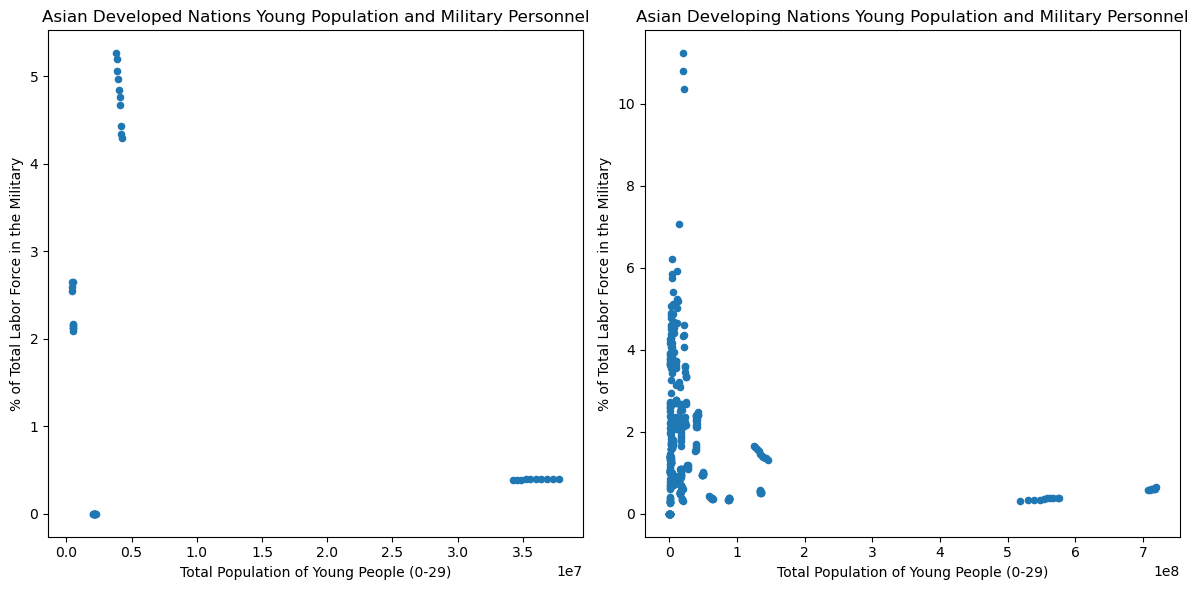

In [28]:
f,axs = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

developed_personnel_joined_df.plot.scatter(
    x = 'Both',
    y = 'value',
    ax = axs[0]
)
developing_personnel_joined_df.plot.scatter(
    x = 'Both',
    y = 'value',
    ax = axs[1]
)

axs[0].set_xlabel('Total Population of Young People (0-29)')
axs[0].set_ylabel('% of Total Labor Force in the Military')
axs[0].set_title('Asian Developed Nations Young Population and Military Personnel')
axs[1].set_xlabel('Total Population of Young People (0-29)')
axs[1].set_ylabel('% of Total Labor Force in the Military')
axs[1].set_title('Asian Developing Nations Young Population and Military Personnel')

f.tight_layout()

In [29]:
f.savefig("Population and Personnel.png")

In [30]:
developed_personnel_joined_df.corr().loc["Both","value"]

-0.40573191669718117

In [31]:
developing_personnel_joined_df.corr().loc["Both","value"]

-0.22956401564536943

In [32]:
developed_expenditure_df = military_df.loc[military_df['Country Name'].isin(developed_list)]
developed_expenditure_df = developed_expenditure_df.loc[developed_expenditure_df['Series Name'] == 'Military expenditure (% of GDP)']
developed_expenditure_df['value'] = developed_expenditure_df['value'].fillna(0)
developed_expenditure_df.reset_index()

,index,Country Name,Country Code,Series Name,Series Code,year,value
0,306,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2010,1.857808
1,1608,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2011,1.742662
2,2910,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2012,1.659399
3,4212,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2013,1.611062
4,5514,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2014,1.547261
5,6816,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2015,1.653213
6,8118,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2016,1.410826
7,9420,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2017,1.583111
8,10722,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2018,1.780486
9,12024,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2019,1.609467


In [33]:
developing_expenditure_df = military_df.loc[military_df['Country Name'].isin(developing_list)]
developing_expenditure_df = developing_expenditure_df.loc[developing_expenditure_df['Series Name'] == 'Military expenditure (% of GDP)']
developing_expenditure_df['value'] = developing_expenditure_df['value'].fillna(0)
developing_expenditure_df.reset_index()

,index,Country Name,Country Code,Series Name,Series Code,year,value
0,0,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2010,1.945836
1,1302,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2011,1.821345
2,2604,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2012,1.175416
3,3906,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2013,1.076950
4,5208,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2014,1.298013
...,...,...,...,...,...,...,...
445,7794,Yemen,YEM,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2015,0.000000
446,9096,Yemen,YEM,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2016,0.000000
447,10398,Yemen,YEM,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2017,0.000000
448,11700,Yemen,YEM,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2018,0.000000


In [34]:
developed_expenditure_joined_df = pd.merge(
    left = developed_scatter_df,
    right = developed_expenditure_df,
    left_on = ['name','year'],
    right_on = ['Country Name','year'],
    how = 'inner'
)
developed_expenditure_joined_df

,name,year,Both,Country Name,Country Code,Series Name,Series Code,value
0,Cyprus,2010,468470.0,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.857808
1,Cyprus,2011,468455.0,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.742662
2,Cyprus,2012,468015.0,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.659399
3,Cyprus,2013,467803.0,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.611062
4,Cyprus,2014,467374.0,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.547261
5,Cyprus,2015,466993.0,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.653213
6,Cyprus,2016,466600.0,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.410826
7,Cyprus,2017,466131.0,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.583111
8,Cyprus,2018,465339.0,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.780486
9,Cyprus,2019,464058.0,Cyprus,CYP,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.609467


In [35]:
developing_expenditure_joined_df = pd.merge(
    left = developing_scatter_df,
    right = developing_expenditure_df,
    left_on = ['name','year'],
    right_on = ['Country Name','year'],
    how = 'inner'
)
developing_expenditure_joined_df

,name,year,Both,Country Name,Country Code,Series Name,Series Code,value
0,Afghanistan,2010,20989176.0,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.945836
1,Afghanistan,2011,21432769.0,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.821345
2,Afghanistan,2012,21890757.0,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.175416
3,Afghanistan,2013,22369177.0,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.076950
4,Afghanistan,2014,22845971.0,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.298013
...,...,...,...,...,...,...,...,...
385,Yemen,2015,18874213.0,Yemen,YEM,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,0.000000
386,Yemen,2016,19168092.0,Yemen,YEM,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,0.000000
387,Yemen,2017,19443119.0,Yemen,YEM,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,0.000000
388,Yemen,2018,19698184.0,Yemen,YEM,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,0.000000


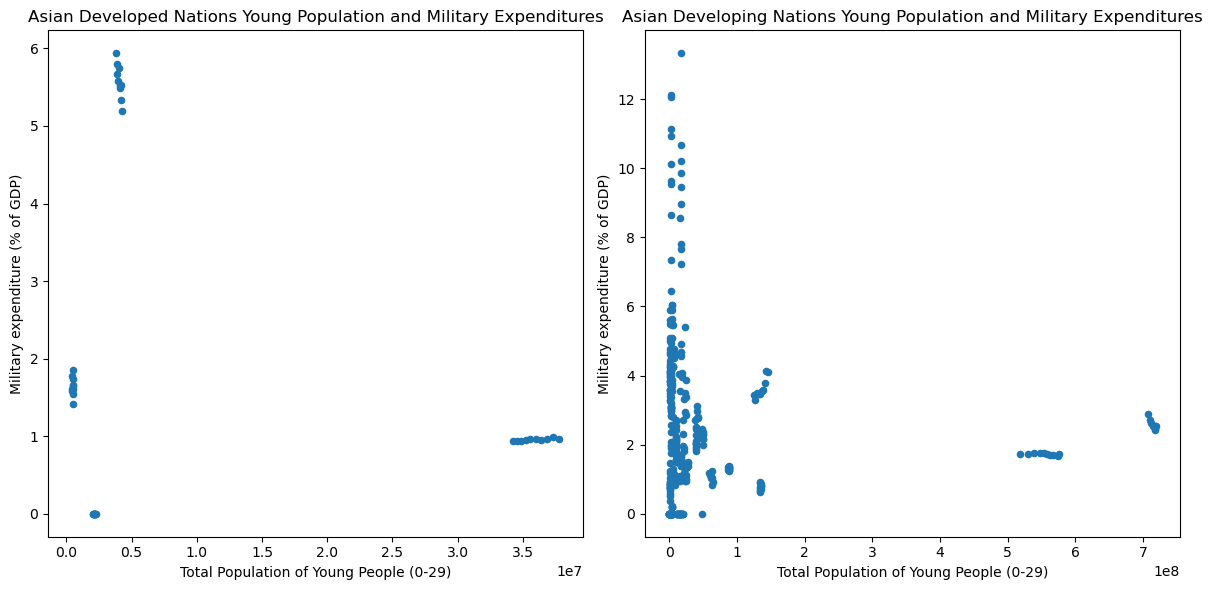

In [36]:
f,axs = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

developed_expenditure_joined_df.plot.scatter(
    x = 'Both',
    y = 'value',
    ax = axs[0]
)
developing_expenditure_joined_df.plot.scatter(
    x = 'Both',
    y = 'value',
    ax = axs[1]
)

axs[0].set_xlabel('Total Population of Young People (0-29)')
axs[0].set_ylabel('Military expenditure (% of GDP)')
axs[0].set_title('Asian Developed Nations Young Population and Military Expenditures')
axs[1].set_xlabel('Total Population of Young People (0-29)')
axs[1].set_ylabel('Military expenditure (% of GDP)')
axs[1].set_title('Asian Developing Nations Young Population and Military Expenditures')

f.tight_layout()

In [37]:
f.savefig("Population and Expenditures.png")

In [38]:
developed_expenditure_joined_df.corr().loc["Both","value"]

-0.23632438649742626

In [39]:
developing_expenditure_joined_df.corr().loc["Both","value"]

-0.029039473959677167

In [40]:
agg_developed_pop_df = developed_pop_df.groupby(['year','age']).agg({'Both':'sum','Female':'sum','Male':'sum'}).reset_index()
agg_developed_pop_df.head(2)

,year,age,Both,Female,Male
0,2010,0-4,7687601.0,3731605.0,3955996.0
1,2010,5-9,7972758.0,3836056.0,4136702.0


In [41]:
agg_developing_pop_df = developing_pop_df.groupby(['year','age']).agg({'Both':'sum','Female':'sum','Male':'sum'}).reset_index()
agg_developing_pop_df.head(2)

,year,age,Both,Female,Male
0,2010,0-4,342501605.0,163239449.0,179262156.0
1,2010,5-9,334821272.0,159511221.0,175310051.0


In [42]:
developed_2010dist_df = agg_developed_pop_df.loc[agg_developed_pop_df['year'] == 2010]
developed_2010dist_df['Male'] = -developed_2010dist_df['Male']

C:\Users\pokepoke1432\AppData\Local\Temp\ipykernel_1208\2534147861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developed_2010dist_df['Male'] = -developed_2010dist_df['Male']


In [43]:
developing_2010dist_df = agg_developing_pop_df.loc[agg_developing_pop_df['year'] == 2010]
developing_2010dist_df['Male'] = -developing_2010dist_df['Male']

C:\Users\pokepoke1432\AppData\Local\Temp\ipykernel_1208\3743706241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developing_2010dist_df['Male'] = -developing_2010dist_df['Male']


In [44]:
developed_2019dist_df = agg_developed_pop_df.loc[agg_developed_pop_df['year'] == 2019]
developed_2019dist_df['Male'] = -developed_2019dist_df['Male']

C:\Users\pokepoke1432\AppData\Local\Temp\ipykernel_1208\221231164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developed_2019dist_df['Male'] = -developed_2019dist_df['Male']


In [45]:
developing_2019dist_df = agg_developing_pop_df.loc[agg_developing_pop_df['year'] == 2019]
developing_2019dist_df['Male'] = -developing_2019dist_df['Male']

C:\Users\pokepoke1432\AppData\Local\Temp\ipykernel_1208\2437567454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developing_2019dist_df['Male'] = -developing_2019dist_df['Male']


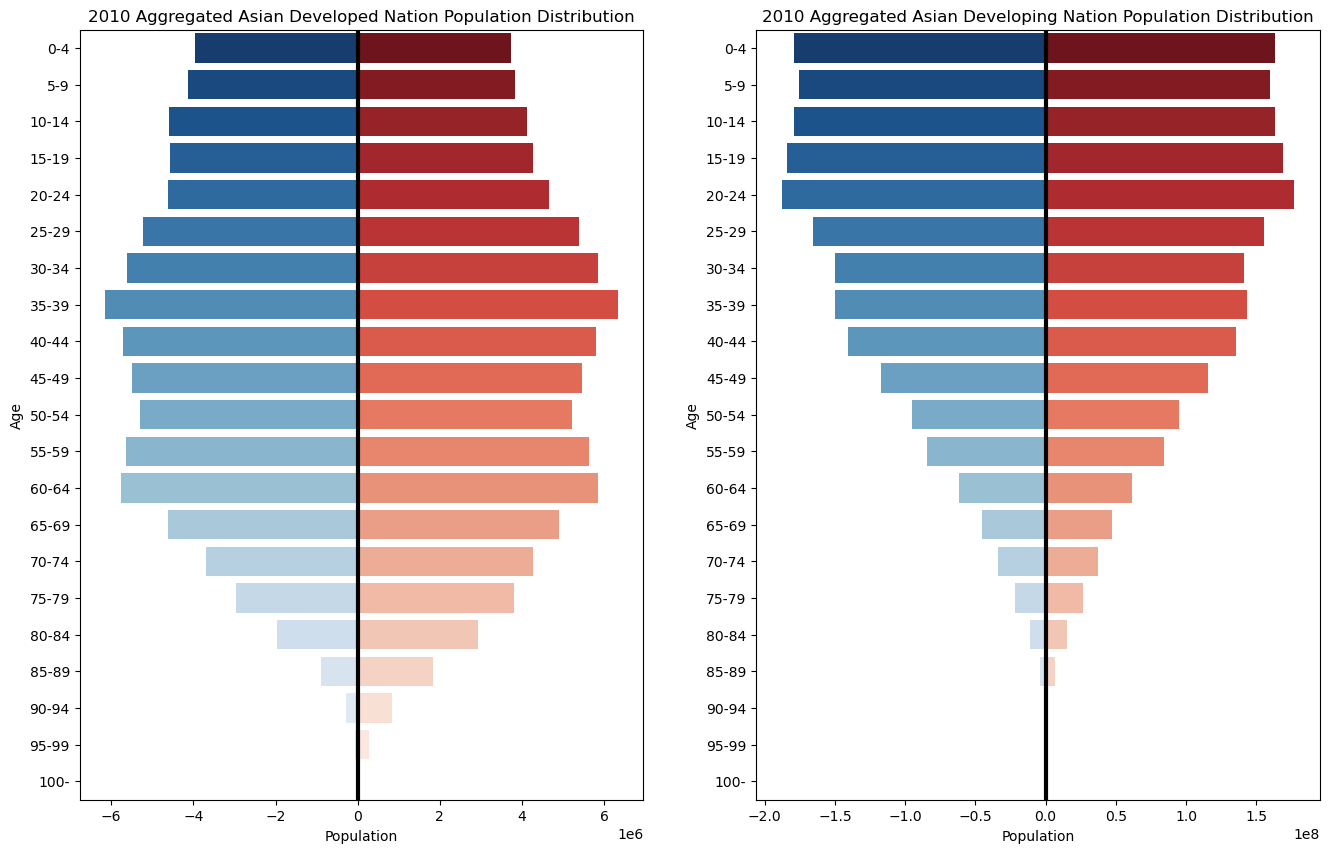

In [46]:
f,axs = plt.subplots(nrows=1,ncols=2,figsize=(16,10))
sb.barplot(x='Female',y='age',data=developed_2010dist_df,ax=axs[0],palette='Reds_r')
sb.barplot(x='Male',y='age',data=developed_2010dist_df,ax=axs[0],palette='Blues_r')
sb.barplot(x='Female',y='age',data=developing_2010dist_df,ax=axs[1],palette='Reds_r')
sb.barplot(x='Male',y='age',data=developing_2010dist_df,ax=axs[1],palette='Blues_r')

axs[0].set_xlabel('Population')
axs[0].set_ylabel('Age')
axs[0].set_title('2010 Aggregated Asian Developed Nation Population Distribution')
axs[1].set_xlabel('Population')
axs[1].set_ylabel('Age')
axs[1].set_title('2010 Aggregated Asian Developing Nation Population Distribution')

axs[0].axvline(0,color='k',lw=3)
axs[1].axvline(0,color='k',lw=3)

In [47]:
f.savefig("2010 Population Distribution.png")

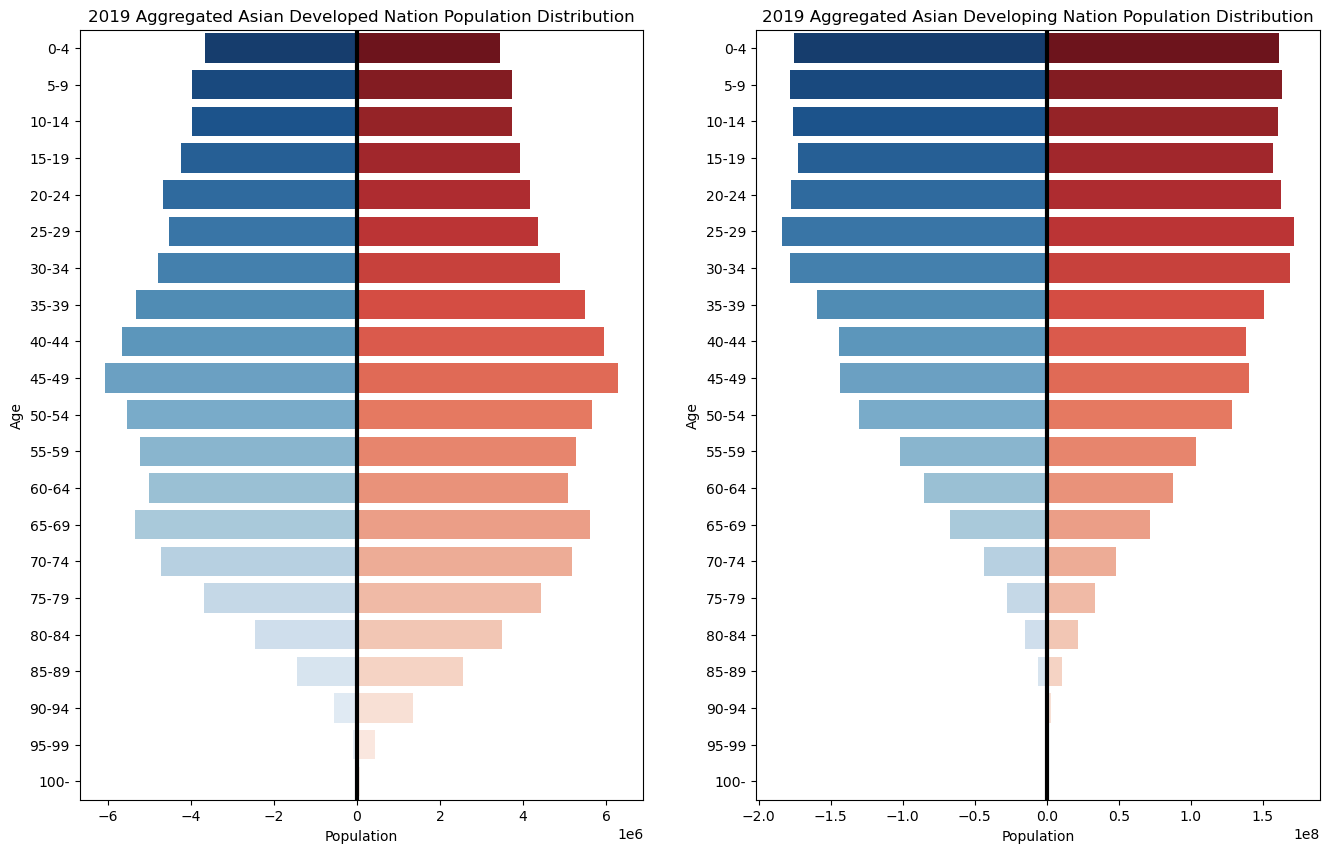

In [48]:
f,axs = plt.subplots(nrows=1,ncols=2,figsize=(16,10))
sb.barplot(x='Female',y='age',data=developed_2019dist_df,ax=axs[0],palette='Reds_r')
sb.barplot(x='Male',y='age',data=developed_2019dist_df,ax=axs[0],palette='Blues_r')
sb.barplot(x='Female',y='age',data=developing_2019dist_df,ax=axs[1],palette='Reds_r')
sb.barplot(x='Male',y='age',data=developing_2019dist_df,ax=axs[1],palette='Blues_r')

axs[0].set_xlabel('Population')
axs[0].set_ylabel('Age')
axs[0].set_title('2019 Aggregated Asian Developed Nation Population Distribution')
axs[1].set_xlabel('Population')
axs[1].set_ylabel('Age')
axs[1].set_title('2019 Aggregated Asian Developing Nation Population Distribution')

axs[0].axvline(0,color='k',lw=3)
axs[1].axvline(0,color='k',lw=3)

In [49]:
f.savefig("2019 Population Distribution.png")

In [50]:
developed_young_df = agg_developed_pop_df.loc[(agg_developed_pop_df['age']=='0-4') |
                         (agg_developed_pop_df['age']=='5-9') |
                         (agg_developed_pop_df['age']=='10-14') |
                         (agg_developed_pop_df['age']=='15-19') |
                         (agg_developed_pop_df['age']=='20-24') |
                         (agg_developed_pop_df['age']=='25-29')]
developed_young_df['Age Group'] = 'Young (0-29)'
developed_young_df

C:\Users\pokepoke1432\AppData\Local\Temp\ipykernel_1208\2221171317.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developed_young_df['Age Group'] = 'Young (0-29)'


,year,age,Both,Female,Male,Age Group
0,2010,0-4,7687601.0,3731605.0,3955996.0,Young (0-29)
1,2010,5-9,7972758.0,3836056.0,4136702.0,Young (0-29)
2,2010,10-14,8705921.0,4118100.0,4587821.0,Young (0-29)
3,2010,15-19,8831733.0,4271657.0,4560076.0,Young (0-29)
4,2010,20-24,9264419.0,4656524.0,4607895.0,Young (0-29)
5,2010,25-29,10607899.0,5389807.0,5218092.0,Young (0-29)
21,2011,0-4,7672092.0,3727856.0,3944236.0,Young (0-29)
22,2011,5-9,7812699.0,3762898.0,4049801.0,Young (0-29)
23,2011,10-14,8610781.0,4089143.0,4521638.0,Young (0-29)
24,2011,15-19,8878728.0,4254942.0,4623786.0,Young (0-29)


In [51]:
developed_middle_df = agg_developed_pop_df.loc[(agg_developed_pop_df['age']=='30-34') |
                         (agg_developed_pop_df['age']=='35-39') |
                         (agg_developed_pop_df['age']=='40-44') |
                         (agg_developed_pop_df['age']=='45-49') |
                         (agg_developed_pop_df['age']=='50-54') |
                         (agg_developed_pop_df['age']=='55-59') |
                           (agg_developed_pop_df['age']=='60-64')]
developed_middle_df['Age Group'] = 'Middle (30-64)'
developed_middle_df

C:\Users\pokepoke1432\AppData\Local\Temp\ipykernel_1208\226886548.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developed_middle_df['Age Group'] = 'Middle (30-64)'


,year,age,Both,Female,Male,Age Group
6,2010,30-34,11449644.0,5837397.0,5612247.0,Middle (30-64)
7,2010,35-39,12472026.0,6327744.0,6144282.0,Middle (30-64)
8,2010,40-44,11493591.0,5789189.0,5704402.0,Middle (30-64)
9,2010,45-49,10958274.0,5458323.0,5499951.0,Middle (30-64)
10,2010,50-54,10509492.0,5213657.0,5295835.0,Middle (30-64)
...,...,...,...,...,...,...
197,2019,40-44,11630523.0,5959450.0,5671073.0,Middle (30-64)
198,2019,45-49,12342353.0,6279960.0,6062393.0,Middle (30-64)
199,2019,50-54,11197064.0,5665404.0,5531660.0,Middle (30-64)
200,2019,55-59,10504842.0,5271947.0,5232895.0,Middle (30-64)


In [52]:
developed_elder_df = agg_developed_pop_df.loc[(agg_developed_pop_df['age']=='65-69') |
                         (agg_developed_pop_df['age']=='70-74') |
                         (agg_developed_pop_df['age']=='75-79') |
                         (agg_developed_pop_df['age']=='80-84') |
                         (agg_developed_pop_df['age']=='85-89') |
                         (agg_developed_pop_df['age']=='90-94') |
                         (agg_developed_pop_df['age']=='95-99') |
                         (agg_developed_pop_df['age']=='100-')]
developed_elder_df['Age Group'] = 'Elder (65-100+)'
developed_elder_df

C:\Users\pokepoke1432\AppData\Local\Temp\ipykernel_1208\2826566414.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developed_elder_df['Age Group'] = 'Elder (65-100+)'


,year,age,Both,Female,Male,Age Group
13,2010,65-69,9514833.0,4903642.0,4611191.0,Elder (65-100+)
14,2010,70-74,7970465.0,4273366.0,3697099.0,Elder (65-100+)
15,2010,75-79,6745535.0,3794387.0,2951148.0,Elder (65-100+)
16,2010,80-84,4902968.0,2933155.0,1969813.0,Elder (65-100+)
17,2010,85-89,2725795.0,1843097.0,882698.0,Elder (65-100+)
...,...,...,...,...,...,...
205,2019,80-84,5961997.0,3502071.0,2459926.0,Elder (65-100+)
206,2019,85-89,3988772.0,2553745.0,1435027.0,Elder (65-100+)
207,2019,90-94,1906934.0,1351357.0,555577.0,Elder (65-100+)
208,2019,95-99,541275.0,434816.0,106459.0,Elder (65-100+)


In [53]:
developed_line_list = [developed_young_df,developed_middle_df,developed_elder_df]
developed_line_df = pd.concat(developed_line_list)
developed_line_df = developed_line_df.groupby(['year','Age Group']).agg({'Both':'sum'})
developed_line_df = developed_line_df.reset_index()
developed_line_df

,year,Age Group,Both
0,2010,Elder (65-100+),33403365.0
1,2010,Middle (30-64),79767796.0
2,2010,Young (0-29),53070331.0
3,2011,Elder (65-100+),33817151.0
4,2011,Middle (30-64),80041601.0
5,2011,Young (0-29),52434712.0
6,2012,Elder (65-100+),34778856.0
7,2012,Middle (30-64),79682846.0
8,2012,Young (0-29),51845234.0
9,2013,Elder (65-100+),36019446.0


In [54]:
developing_young_df = agg_developing_pop_df.loc[(agg_developing_pop_df['age']=='0-4') |
                         (agg_developing_pop_df['age']=='5-9') |
                         (agg_developing_pop_df['age']=='10-14') |
                         (agg_developing_pop_df['age']=='15-19') |
                         (agg_developing_pop_df['age']=='20-24') |
                         (agg_developing_pop_df['age']=='25-29')]
developing_young_df['Age Group'] = 'Young (0-29)'
developing_young_df

C:\Users\pokepoke1432\AppData\Local\Temp\ipykernel_1208\3822578105.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developing_young_df['Age Group'] = 'Young (0-29)'


,year,age,Both,Female,Male,Age Group
0,2010,0-4,342501605.0,163239449.0,179262156.0,Young (0-29)
1,2010,5-9,334821272.0,159511221.0,175310051.0,Young (0-29)
2,2010,10-14,342983776.0,163525483.0,179458293.0,Young (0-29)
3,2010,15-19,353011129.0,169098265.0,183912864.0,Young (0-29)
4,2010,20-24,364837424.0,176903501.0,187933923.0,Young (0-29)
5,2010,25-29,320724281.0,155398061.0,165326220.0,Young (0-29)
21,2011,0-4,343310802.0,163657995.0,179652807.0,Young (0-29)
22,2011,5-9,334772758.0,159488400.0,175284358.0,Young (0-29)
23,2011,10-14,339762308.0,161916891.0,177845417.0,Young (0-29)
24,2011,15-19,350834111.0,167871537.0,182962574.0,Young (0-29)


In [55]:
developing_middle_df = agg_developing_pop_df.loc[(agg_developing_pop_df['age']=='30-34') |
                         (agg_developing_pop_df['age']=='35-39') |
                         (agg_developing_pop_df['age']=='40-44') |
                         (agg_developing_pop_df['age']=='45-49') |
                         (agg_developing_pop_df['age']=='50-54') |
                         (agg_developing_pop_df['age']=='55-59') |
                           (agg_developing_pop_df['age']=='60-64')]
developing_middle_df['Age Group'] = 'Middle (30-64)'
developing_middle_df

C:\Users\pokepoke1432\AppData\Local\Temp\ipykernel_1208\4101957265.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developing_middle_df['Age Group'] = 'Middle (30-64)'


,year,age,Both,Female,Male,Age Group
6,2010,30-34,291883002.0,141624477.0,150258525.0,Middle (30-64)
7,2010,35-39,292829282.0,143118305.0,149710977.0,Middle (30-64)
8,2010,40-44,276138751.0,135646681.0,140492070.0,Middle (30-64)
9,2010,45-49,232814303.0,115730278.0,117084025.0,Middle (30-64)
10,2010,50-54,190205276.0,94758583.0,95446693.0,Middle (30-64)
...,...,...,...,...,...,...
197,2019,40-44,282874277.0,138241123.0,144633154.0,Middle (30-64)
198,2019,45-49,284208968.0,140292665.0,143916303.0,Middle (30-64)
199,2019,50-54,259030388.0,128783999.0,130246389.0,Middle (30-64)
200,2019,55-59,205430946.0,103410931.0,102020015.0,Middle (30-64)


In [56]:
developing_elder_df = agg_developing_pop_df.loc[(agg_developing_pop_df['age']=='65-69') |
                         (agg_developing_pop_df['age']=='70-74') |
                         (agg_developing_pop_df['age']=='75-79') |
                         (agg_developing_pop_df['age']=='80-84') |
                         (agg_developing_pop_df['age']=='85-89') |
                         (agg_developing_pop_df['age']=='90-94') |
                         (agg_developing_pop_df['age']=='95-99') |
                         (agg_developing_pop_df['age']=='100-')]
developing_elder_df['Age Group'] = 'Elder (65-100+)'
developing_elder_df

C:\Users\pokepoke1432\AppData\Local\Temp\ipykernel_1208\1150534599.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developing_elder_df['Age Group'] = 'Elder (65-100+)'


,year,age,Both,Female,Male,Age Group
13,2010,65-69,92078976.0,47123436.0,44955540.0,Elder (65-100+)
14,2010,70-74,71029475.0,37374051.0,33655424.0,Elder (65-100+)
15,2010,75-79,48161864.0,26379081.0,21782783.0,Elder (65-100+)
16,2010,80-84,25858014.0,15067323.0,10790691.0,Elder (65-100+)
17,2010,85-89,10075220.0,6355539.0,3719681.0,Elder (65-100+)
...,...,...,...,...,...,...
205,2019,80-84,36937121.0,21449519.0,15487602.0,Elder (65-100+)
206,2019,85-89,16596168.0,10311885.0,6284283.0,Elder (65-100+)
207,2019,90-94,4841414.0,3227196.0,1614218.0,Elder (65-100+)
208,2019,95-99,862582.0,613046.0,249536.0,Elder (65-100+)


In [57]:
developing_line_list = [developing_young_df,developing_middle_df,developing_elder_df]
developing_line_df = pd.concat(developing_line_list)
developing_line_df = developing_line_df.groupby(['year','Age Group']).agg({'Both':'sum'})
developing_line_df = developing_line_df.reset_index()
developing_line_df

,year,Age Group,Both
0,2010,Elder (65-100+),2.504018e+08
1,2010,Middle (30-64),1.575219e+09
2,2010,Young (0-29),2.058879e+09
3,2011,Elder (65-100+),2.576619e+08
4,2011,Middle (30-64),1.605717e+09
5,2011,Young (0-29),2.064218e+09
6,2012,Elder (65-100+),2.658608e+08
7,2012,Middle (30-64),1.641501e+09
8,2012,Young (0-29),2.063328e+09
9,2013,Elder (65-100+),2.746681e+08


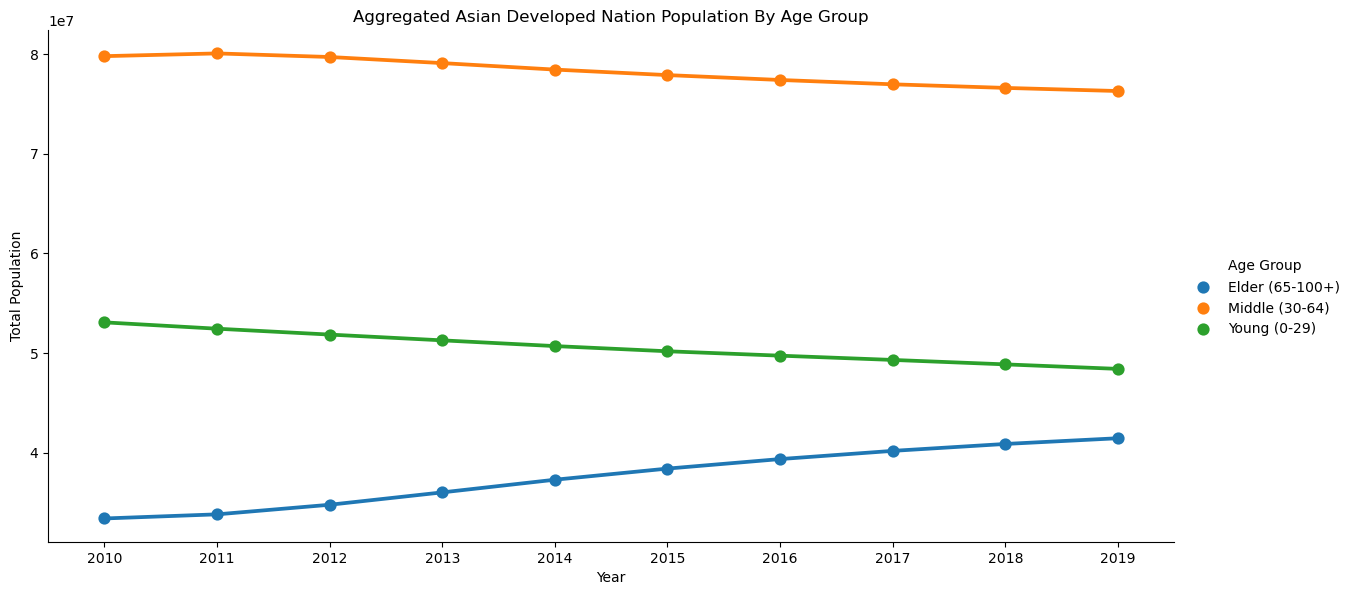

In [58]:
developed_lineplot = sb.catplot(
    x="year",
    y="Both",
    hue="Age Group",
    data=developed_line_df,
    kind="point",
    aspect=2,
    height=6
).set(
    xlabel = "Year",
    ylabel = "Total Population",
    title = "Aggregated Asian Developed Nation Population By Age Group"
)

In [59]:
developed_lineplot.savefig("Developed Pop Line Plot.png")

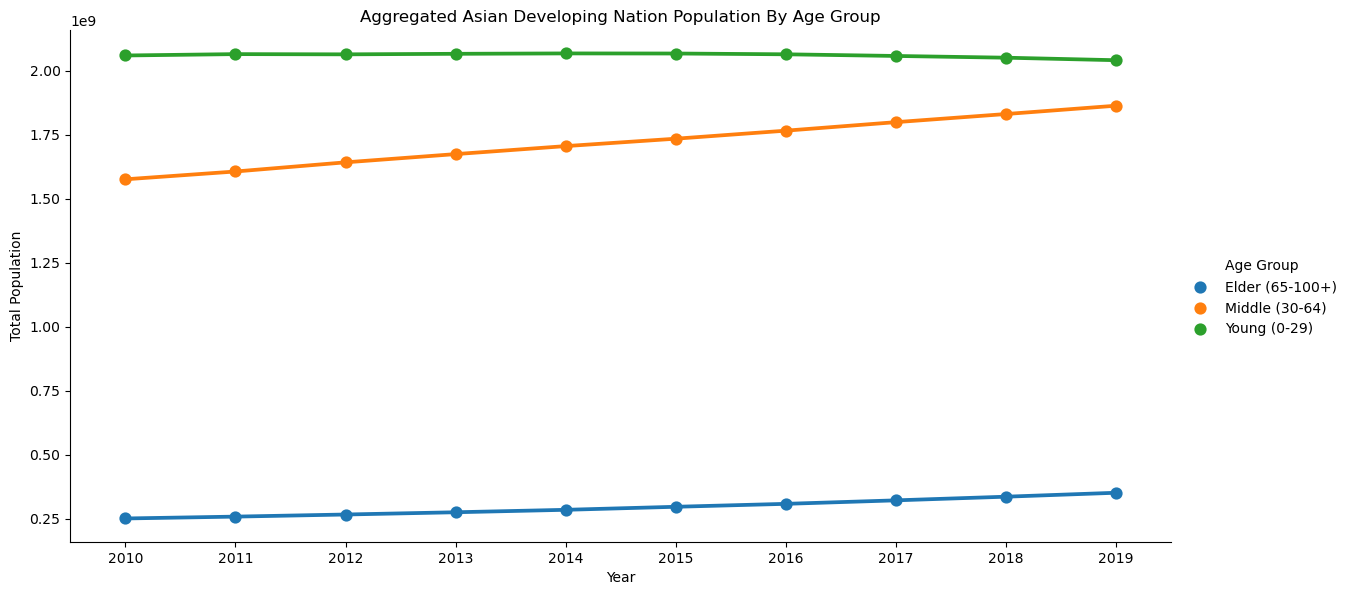

In [60]:
developing_lineplot = sb.catplot(
    x="year",
    y="Both",
    hue="Age Group",
    data=developing_line_df,
    kind="point",
    aspect=2,
    height=6
).set(
    xlabel = "Year",
    ylabel = "Total Population",
    title = "Aggregated Asian Developing Nation Population By Age Group"
)

In [61]:
developing_lineplot.savefig("Developing Pop Line Plot.png")